In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
# pd.set_option("display.max_colwidth", None)

In [3]:
df = pd.read_csv('output_0.csv',encoding='utf8')


In [4]:
df.shape

(5628, 4)

In [ ]:

df.head(3)

,id,url,isShown,info
2,6ebaba86-9c57-4842-a82b-db08fbb283f2,https://www.elle.com/jp/culture/celebgossip/g4...,1.0,"[{""id"":""slide-1"",""total"":849.8624877929688,""sp..."
3,5ed5e05c-7010-4596-afec-1c409fb20d64,https://www.elle.com/jp/decor/decor-interior-d...,1.0,"[{""id"":""slide-1"",""total"":542.1000366210938,""sp..."
4,a84a1916-9847-450e-93e6-13cbbe5df32e,https://www.elle.com/jp/decor/decor-interior-d...,0.0,"[{""id"":""slide-1"",""total"":914.4000244140625,""sp..."


In [5]:
df = df.dropna()
df.shape

(5595, 4)

In [6]:
df_exceed = df[df['isShown'] == 1.0]
df_exceed.shape

(3832, 4)

In [7]:
def filter_high_total(info_str):
    try:
        # Load JSON string into Python list
        info_list = json.loads(info_str)
        # Filter dictionaries where total is greater than 670
        filtered_list = [entry for entry in info_list if entry["total"] > 670]
        return json.dumps(filtered_list)  # Convert back to string to store in DataFrame
    except json.JSONDecodeError:
        return '[]'  # Return empty list if JSON decoding fails

# Apply filtering function to 'info' column
df_exceed['filtered_info'] = df_exceed['info'].apply(filter_high_total)

C:\Users\G6330\AppData\Local\Temp\ipykernel_1784\469450131.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exceed['filtered_info'] = df_exceed['info'].apply(filter_high_total)


In [ ]:
df_exceed['filtered_info'].head(3)

2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           [{"id": "slide-1", "total": 849.8624877929688, "span": 13.60

In [8]:
def expand_info(row):
    try:
        info_list = json.loads(row['filtered_info'])  # Parse JSON
        for entry in info_list:
            entry.pop('id', None)
            entry['original_id'] = row['id']  # Keep track of original id
            entry['original_url'] = row['url']  # Keep track of original URL
        return info_list
    except json.JSONDecodeError:
        return []

# Flatten the data
expanded_data = df_exceed.apply(expand_info, axis=1).explode().dropna().reset_index(drop=True)

# Convert list of dictionaries into DataFrame
expanded_df = pd.json_normalize(expanded_data)

# Rename columns for clarity
expanded_df.rename(columns={'original_id': 'id', 'original_url': 'url'}, inplace=True)

In [9]:
expanded_df.head(2)

,total,span,h2,img,description,id,url
0,849.862488,13.6,31.200001,566.862488,236.800003,6ebaba86-9c57-4842-a82b-db08fbb283f2,https://www.elle.com/jp/culture/celebgossip/g4...
1,745.400024,13.6,31.200001,590.400024,108.800003,6ebaba86-9c57-4842-a82b-db08fbb283f2,https://www.elle.com/jp/culture/celebgossip/g4...


In [10]:
expanded_df.shape

(34176, 7)

In [11]:
unique_span = expanded_df['span'].unique()
print(len(unique_span))
unique_h2 = expanded_df['h2'].unique()
print(len(unique_h2))
unique_img = expanded_df['img'].unique()
print(len(unique_img))
unique_description = expanded_df['description'].unique()
print(len(unique_description))


40
51
3987
2184


In [17]:
expanded_df['span'].value_counts()

span
13.600000     10423
0.000000       9437
16.800001      2883
72.800003      2812
21.600000      2549
40.000000      1615
19.200001      1060
80.599998       920
15.000000       905
11.200000       742
64.000000       451
30.237501       113
22.400000        64
24.000000        46
23.650000        35
46.875000        19
57.600002        12
20.700001        12
37.799999        11
54.000000         8
62.000000         7
35.037502         6
35.200001         6
63.512501         6
27.837500         5
49.600002         4
84.000000         4
67.200005         3
36.000000         3
47.000000         3
31.200001         2
17.600000         2
100.800003        1
51.200001         1
203.199997        1
149.600006        1
303.200012        1
33.437500         1
47.200001         1
102.599998        1
Name: count, dtype: int64

In [13]:
expanded_height_df = expanded_df[['total','span','h2','img','description']]
expanded_height_df.describe()

,total,span,h2,img,description
count,34176.000000,34176.000000,34176.000000,34176.000000,34176.000000
mean,860.354705,19.684058,39.167857,470.409767,308.540600
std,171.490075,22.506723,25.499507,190.570815,234.835298
min,670.037537,0.000000,0.000000,0.000000,0.000000
25%,734.600037,0.000000,31.200001,388.946884,134.400009
50%,814.062500,13.600000,33.600002,546.000000,268.200012
75%,935.600037,21.600000,62.400002,590.112488,408.800018
max,3588.100098,303.200012,290.399994,1747.599976,3128.600098


In [14]:
expanded_height_df.head(5)

,total,span,h2,img,description
0,849.862488,13.6,31.200001,566.862488,236.800003
1,745.400024,13.6,31.200001,590.400024,108.800003
2,745.400024,13.6,31.200001,590.400024,108.800003
3,821.912537,13.6,31.200001,590.112488,185.600006
4,689.174988,13.6,31.200001,534.174988,108.800003


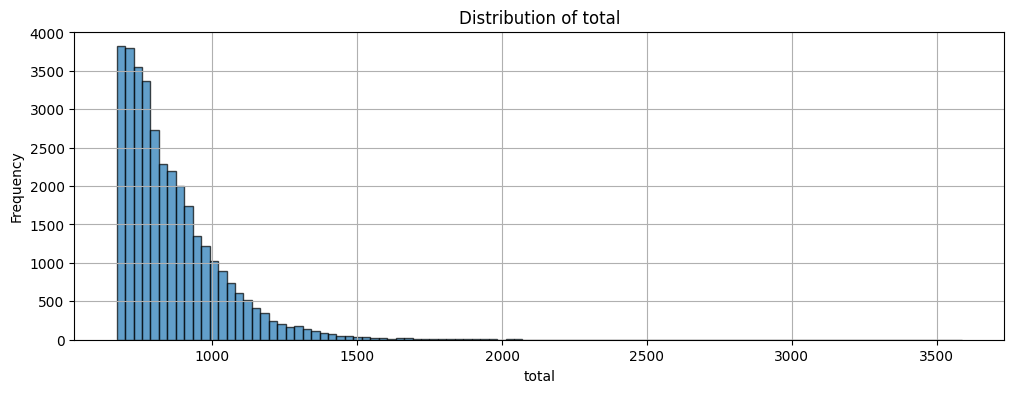

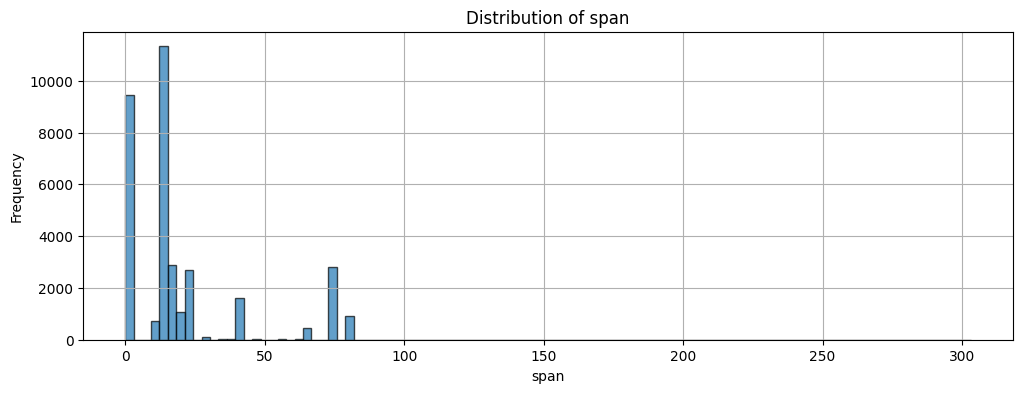

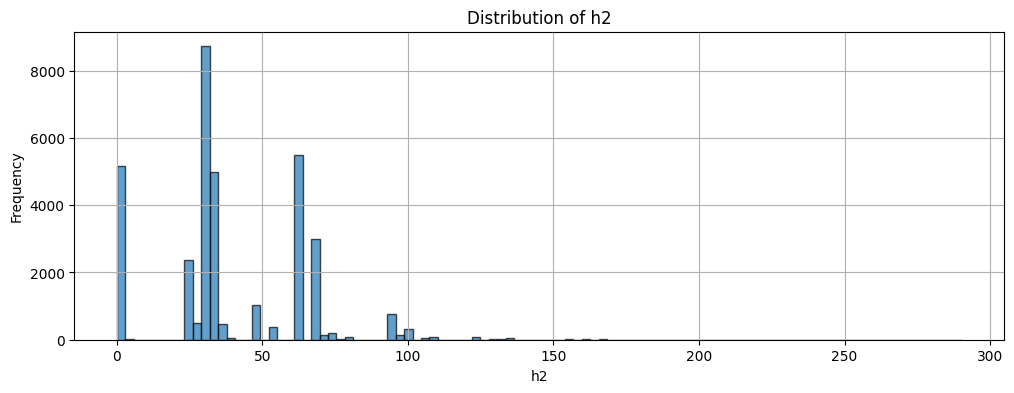

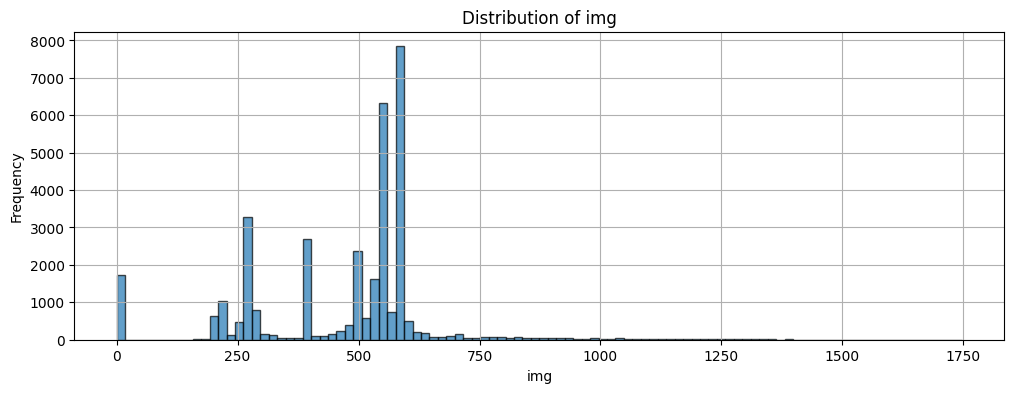

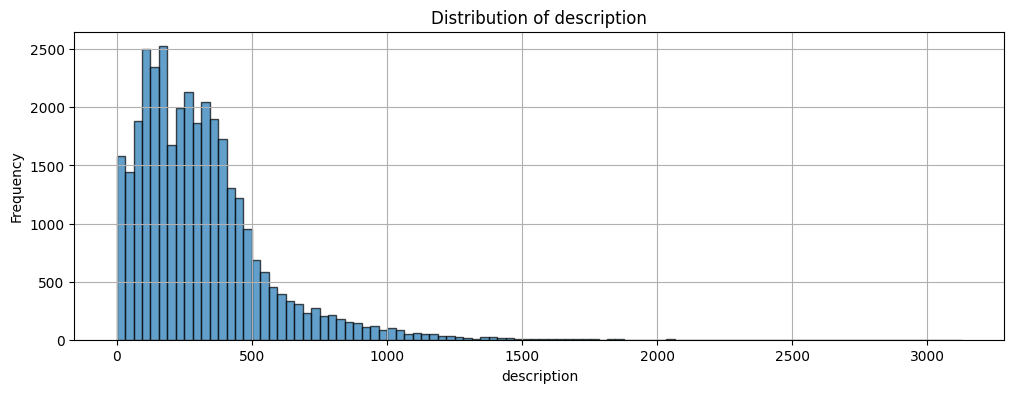

In [15]:
for column in ["total", "span", "h2", "img", "description"]:
    plt.figure(figsize=(12, 4))
    plt.hist(expanded_height_df[column], bins=100, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()